<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.callbacks import Callback
%matplotlib inline

Using TensorFlow backend.


## Pregunta 1

**a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas**

In [2]:
df = pd.read_csv("EnergyMolecule/roboBohr.csv")
df.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total = len(df)

print(df.shape)
print(df.info())

dfTrain = df[:int(0.6*total)]
dfVal = df[int(0.6*total):int(0.85*total)]    
dfTest = df[int(0.85*total)::]

(16242, 1276)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1276 entries, 0 to Eat
dtypes: float64(1276)
memory usage: 158.1 MB
None


Los datos corresponden a un csv compuesto de 1276 columnas correspondientes a las variables, y 16242 filas que corresponden a las diferentes simulaciones.

Las columnas 'Unnamed: 0' y 'pubchem_id' se eliminan por no tener datos relevante para los conjuntos de entrenamiento, validación y testeo. 'Unnamed: 0' no es necesaria debido a que corresponde a una enumeración, y el dataframe de panda ya viene con una incluída. 'pubchem_id' no es necesaria tampoco pues corresponde a la ID de la simulación.

**a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento**

Para un mejor funcionamiento de los algoritmos de Machine learning, hay que normalizar las variables de entrada del algoritmo, Normalizar, hace referencia a extender o comprimir los valores de una variable para estar en un rango definido. Es decir, realiza una ponderación de las caracterisiticas de una mejor manera y ademas se reduce el facor de escala. Sin embargo, realizar una mala eleccion del metodo de normalización puede alterar los resultados del analisis de datos. En este caso, se realiza una estandarización de los datos, debido a que si usamos normalización los outlayers podrían causar un desbalance de los datos en el intervalo, haciendo que muchos de ellos se agrupen cerca del 0.0 y que el outlayer quede como -1 o 1.


In [3]:
#Pre-processing#

#x var's
xTrain = pd.DataFrame.copy(dfTrain)
xVal = pd.DataFrame.copy(dfVal)
xTest = pd.DataFrame.copy(dfTest)

#y var's
yTrain = xTrain.pop('Eat').values.reshape(-1, 1)
yVal = xVal.pop('Eat').values.reshape(-1, 1)
yTest = xTest.pop('Eat').values.reshape(-1, 1)

#Scaler
scaler = StandardScaler().fit(xTrain)

#All standarized
xTrainScaled = pd.DataFrame(scaler.transform(xTrain),columns=xTrain.columns)
xValScaled = pd.DataFrame(scaler.transform(xVal),columns=xVal.columns)
xTestScaled = pd.DataFrame(scaler.transform(xTest),columns=xTest.columns)

**b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

In [11]:
test_loss = np.zeros(250)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss = self.model.evaluate(x, y, verbose=0)
        test_loss[epoch-1] = loss
        print('\nTesting loss: {}'.format(loss))

In [14]:
model = Sequential()
model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy'] 
history = model.fit(xTrainScaled.values,
                    yTrain,
                    epochs=250,
                    verbose=1,
                    validation_data=(xValScaled.values, yVal), 
                    callbacks=[TestCallback((xTestScaled.values, yTest))])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9440/9745 [============================>.] - ETA: 0s - loss: 1.4771
Testing loss: 0.5555095474648828
9745/9745 [==============================] - 1s - loss: 1.4520 - val_loss: 0.5497
Epoch 2/250
9120/9745 [===========================>..] - ETA: 0s - loss: 0.5962
Testing loss: 0.4435086901015711
9745/9745 [==============================] - 0s - loss: 0.5911 - val_loss: 0.4820
Epoch 3/250
9088/9745 [==========================>...] - ETA: 0s - loss: 0.4979
Testing loss: 0.41311463033707846
9745/9745 [==============================] - 0s - loss: 0.5039 - val_loss: 0.4040
Epoch 4/250
9568/9745 [============================>.] - ETA: 0s - loss: 0.4153
Testing loss: 0.37228006310378814
9745/9745 [==============================] - 0s - loss: 0.4138 - val_loss: 0.4281
Epoch 5/250
9728/9745 [============================>.] - ETA: 0s - loss: 0.3621
Testing loss: 0.2592108506888188
9745/9745 [==============================] - 1s - loss: 0

9440/9745 [============================>.] - ETA: 0s - loss: 0.0464
Testing loss: 0.04208349773204004
9745/9745 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0600
Epoch 43/250
9344/9745 [===========================>..] - ETA: 0s - loss: 0.0454
Testing loss: 0.03997813793305104
9745/9745 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0596
Epoch 44/250
9568/9745 [============================>.] - ETA: 0s - loss: 0.0446
Testing loss: 0.12340208395832525
9745/9745 [==============================] - 0s - loss: 0.0449 - val_loss: 0.1165
Epoch 45/250
9472/9745 [============================>.] - ETA: 0s - loss: 0.0447
Testing loss: 0.050633430506943876
9745/9745 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0855
Epoch 46/250
9536/9745 [============================>.] - ETA: 0s - loss: 0.0427
Testing loss: 0.03760914148049713
9745/9745 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0538
Epoch 47/250
9376/9745 [===

9745/9745 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0428
Epoch 84/250
9184/9745 [===========================>..] - ETA: 0s - loss: 0.0309
Testing loss: 0.03173909368506332
9745/9745 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0453
Epoch 85/250
9632/9745 [============================>.] - ETA: 0s - loss: 0.0290
Testing loss: 0.05934378542051875
9745/9745 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0881
Epoch 86/250
9408/9745 [===========================>..] - ETA: 0s - loss: 0.0293
Testing loss: 0.030961664194056965
9745/9745 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0429
Epoch 87/250
9728/9745 [============================>.] - ETA: 0s - loss: 0.0294
Testing loss: 0.03020917755774435
9745/9745 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0416
Epoch 88/250
9664/9745 [============================>.] - ETA: 0s - loss: 0.0280
Testing loss: 0.038144125531675586
9745/9745 [==

9152/9745 [===========================>..] - ETA: 0s - loss: 0.0230
Testing loss: 0.04100916799116585
9745/9745 [==============================] - 1s - loss: 0.0231 - val_loss: 0.0414
Epoch 126/250
9280/9745 [===========================>..] - ETA: 0s - loss: 0.0233
Testing loss: 0.02761955601979119
9745/9745 [==============================] - 0s - loss: 0.0235 - val_loss: 0.0379
Epoch 127/250
9632/9745 [============================>.] - ETA: 0s - loss: 0.0241
Testing loss: 0.03404263862793532
9745/9745 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0405
Epoch 128/250
9408/9745 [===========================>..] - ETA: 0s - loss: 0.0222
Testing loss: 0.04223773892010437
9745/9745 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0500
Epoch 129/250
9472/9745 [============================>.] - ETA: 0s - loss: 0.0240
Testing loss: 0.050301453347058385
9745/9745 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0510
Epoch 130/250
9344/9745

9024/9745 [==========================>...] - ETA: 0s - loss: 0.0203
Testing loss: 0.029794708177314326
9745/9745 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0400
Epoch 167/250
9376/9745 [===========================>..] - ETA: 0s - loss: 0.0201
Testing loss: 0.031939793735815944
9745/9745 [==============================] - 1s - loss: 0.0202 - val_loss: 0.0360
Epoch 168/250
9664/9745 [============================>.] - ETA: 0s - loss: 0.0200
Testing loss: 0.02732608948632078
9745/9745 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0351
Epoch 169/250
9408/9745 [===========================>..] - ETA: 0s - loss: 0.0191
Testing loss: 0.02785180108625538
9745/9745 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0371
Epoch 170/250
9248/9745 [===========================>..] - ETA: 0s - loss: 0.0193
Testing loss: 0.03236693885960036
9745/9745 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0362
Epoch 171/250
9376/974

9312/9745 [===========================>..] - ETA: 0s - loss: 0.0171
Testing loss: 0.03889727981659444
9745/9745 [==============================] - 0s - loss: 0.0172 - val_loss: 0.0490
Epoch 208/250
9664/9745 [============================>.] - ETA: 0s - loss: 0.0169
Testing loss: 0.03001141491520708
9745/9745 [==============================] - 0s - loss: 0.0170 - val_loss: 0.0364
Epoch 209/250
9216/9745 [===========================>..] - ETA: 0s - loss: 0.0170
Testing loss: 0.026111640662465446
9745/9745 [==============================] - 0s - loss: 0.0171 - val_loss: 0.0348
Epoch 210/250
9504/9745 [============================>.] - ETA: 0s - loss: 0.0167
Testing loss: 0.028026540737689325
9745/9745 [==============================] - 0s - loss: 0.0167 - val_loss: 0.0353
Epoch 211/250
9696/9745 [============================>.] - ETA: 0s - loss: 0.0173
Testing loss: 0.027394787876174668
9745/9745 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0332
Epoch 212/250
9152/97

9472/9745 [============================>.] - ETA: 0s - loss: 0.0155
Testing loss: 0.02390925139335898
9745/9745 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0307
Epoch 249/250
9568/9745 [============================>.] - ETA: 0s - loss: 0.0152
Testing loss: 0.02589450036448793
9745/9745 [==============================] - 1s - loss: 0.0153 - val_loss: 0.0341
Epoch 250/250
9344/9745 [===========================>..] - ETA: 0s - loss: 0.0159
Testing loss: 0.027349968457168024
9745/9745 [==============================] - 1s - loss: 0.0160 - val_loss: 0.0369


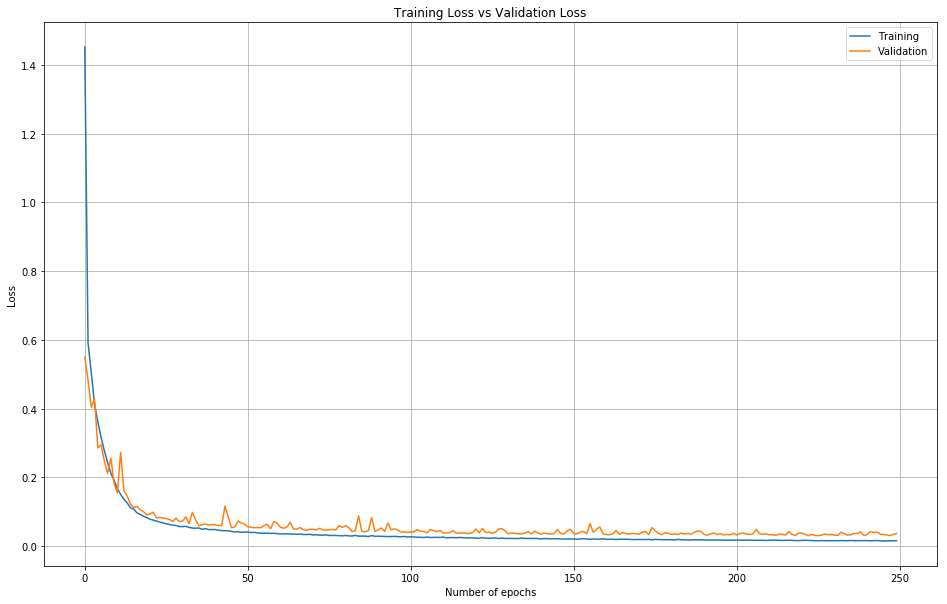

In [15]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

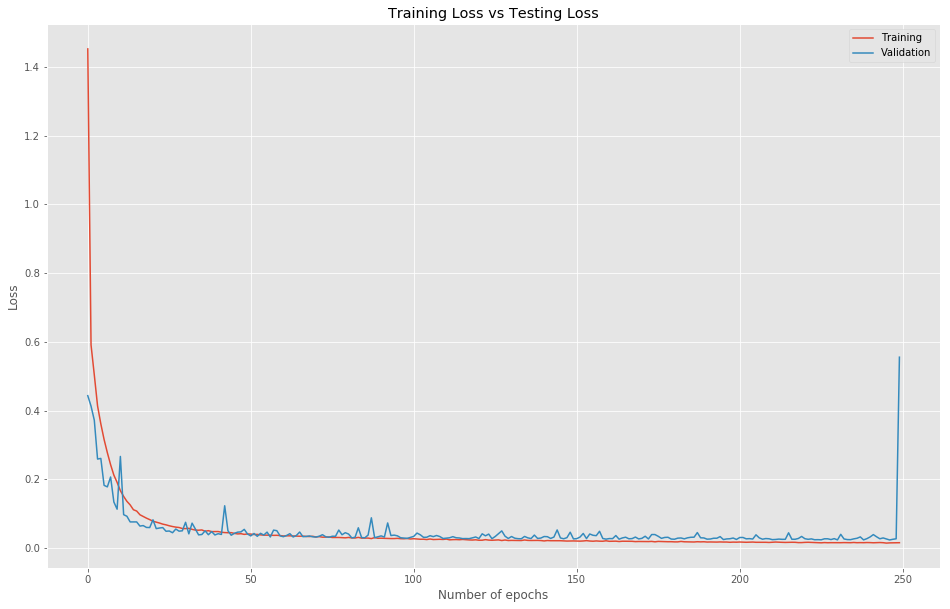

In [16]:
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

In [17]:
print(test_loss)

[ 0.44350869  0.41311463  0.37228006  0.25921085  0.26108609  0.18276348
  0.17831137  0.20696926  0.13432266  0.11341399  0.26679711  0.09749209
  0.09288449  0.07638194  0.07632712  0.07640423  0.0642693   0.0657685
  0.06034925  0.06001588  0.08252177  0.05690879  0.05869206  0.05988968
  0.04923752  0.04996504  0.04495388  0.05572298  0.04950692  0.05053759
  0.07528517  0.04164146  0.07281882  0.05580679  0.03873126  0.03983459
  0.05044161  0.03915793  0.0482611   0.03841261  0.0420835   0.03997814
  0.12340208  0.05063343  0.03760914  0.04337364  0.04668002  0.04737611
  0.0547626   0.04128579  0.03569352  0.04277151  0.03451073  0.04324369
  0.03814974  0.04677394  0.03254931  0.05254323  0.05086611  0.03586672
  0.03337009  0.037004    0.04217807  0.03258353  0.03697006  0.04694491
  0.03342783  0.03422593  0.03553234  0.03307966  0.03239947  0.03479549
  0.03920427  0.03323101  0.03169423  0.03475048  0.03461972  0.05274368
  0.03910842  0.04506827  0.0411411   0.03002296  0.

>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#%%El gráfico el error cuadrático (MSE) 
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available)
plt.style.use(['ggplot'])
#%%
```

El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y **función de activación sigmoidal**. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

**Faltan comentarios sobre DIVERGENCIA !!!**

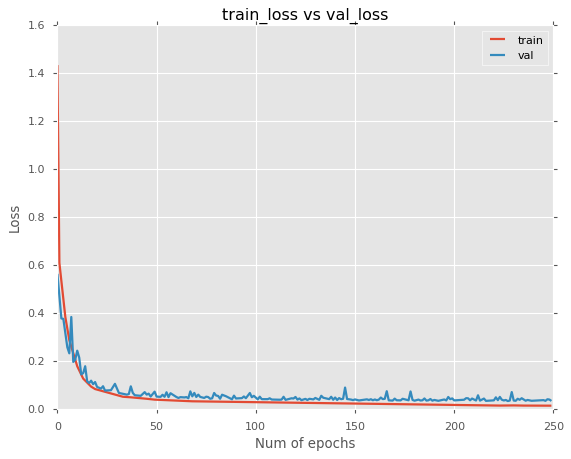

> c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#%%El gráfico el error cuadrático (MSE) 
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available)
plt.style.use(['ggplot'])
#%%
```

>El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

>**Faltan comentarios!!!**
>Modificando solo esas lineas,este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
```
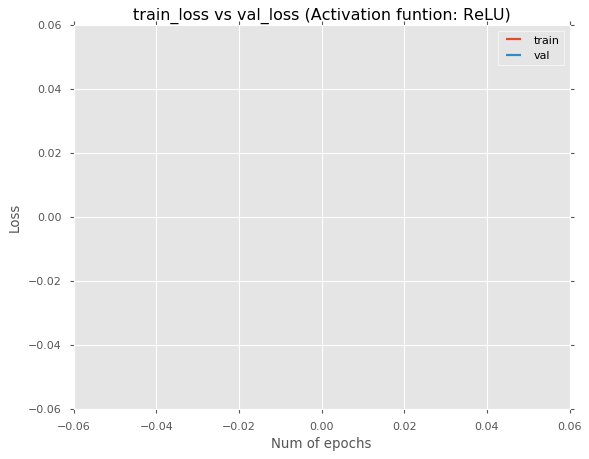


>Con este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="relu")) 
```
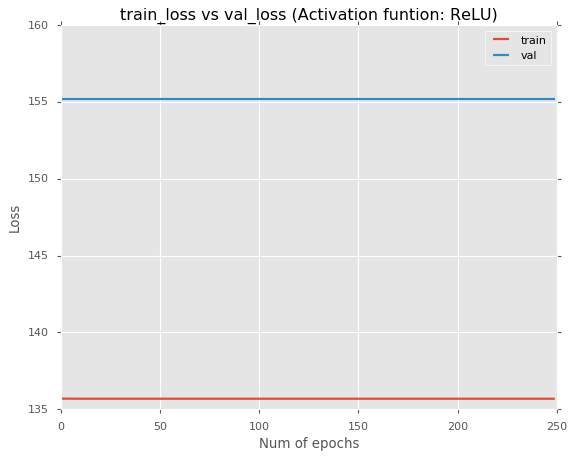